<a href="https://colab.research.google.com/github/JulianMejia6/IA_2025/blob/main/arbol_de_decisiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AGENDA
1. Objetivo de estudio
2. Exploración de datos EDA
3. Limpieza de datos
4. Entrenar el modelo (Árbol de desición)
5. Evaluar el modelo

In [23]:
#Tratamiento de datos
import pandas as pd
import numpy as np

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Modelado
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor # Uncommented this line

In [5]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising_Web.csv")
datos.head

<bound method NDFrame.head of      Unnamed: 0    X     TV  Radio  Newspaper         Web  Sales
0             1    1  230.1   37.8       69.2  306.634752   22.1
1             2    2   44.5   39.3       45.1  302.653070   10.4
2             3    3   17.2   45.9       69.3   49.498908    9.3
3             4    4  151.5   41.3       58.5  257.816893   18.5
4             5    5  180.8   10.8       58.4  195.660076   12.9
..          ...  ...    ...    ...        ...         ...    ...
195         196  196   38.2    3.7       13.8  248.841073    7.6
196         197  197   94.2    4.9        8.1  118.041856    9.7
197         198  198  177.0    9.3        6.4  213.274671   12.8
198         199  199  283.6   42.0       66.2  237.498063   25.5
199         200  200  232.1    8.6        8.7  151.990733   13.4

[200 rows x 7 columns]>

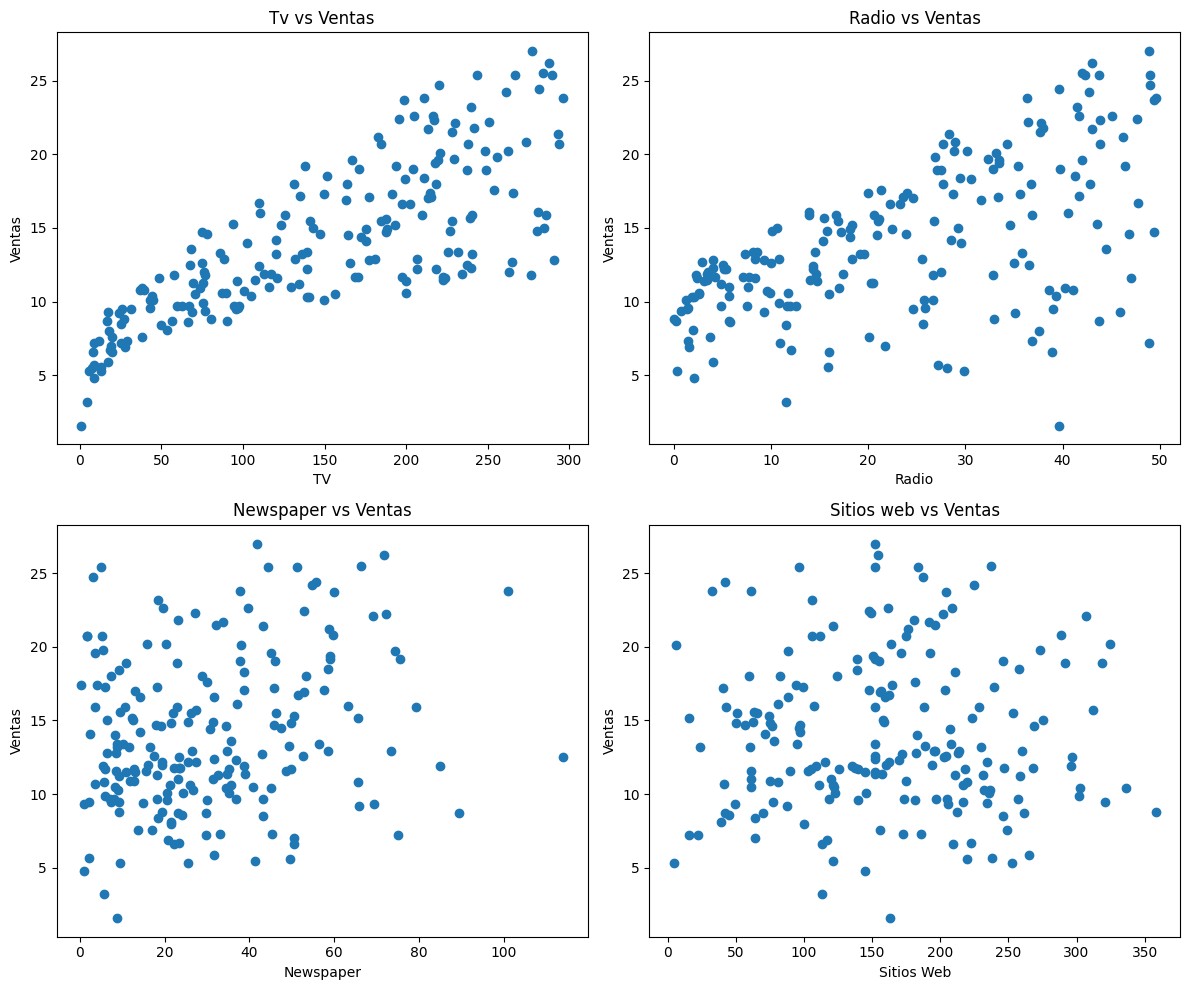

In [11]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,10))

axes[0,0].scatter(datos["TV"],datos["Sales"])
axes[0,0].set_xlabel("TV")
axes[0,0].set_ylabel("Ventas")
axes[0,0].set_title("Tv vs Ventas")

axes[0,1].scatter(datos["Radio"],datos["Sales"])
axes[0,1].set_xlabel("Radio")
axes[0,1].set_ylabel("Ventas")
axes[0,1].set_title("Radio vs Ventas")

axes[1,0].scatter(datos["Newspaper"],datos["Sales"])
axes[1,0].set_xlabel("Newspaper")
axes[1,0].set_ylabel("Ventas")
axes[1,0].set_title("Newspaper vs Ventas")

axes[1,1].scatter(datos["Web"],datos["Sales"])
axes[1,1].set_xlabel("Sitios Web")
axes[1,1].set_ylabel("Ventas")
axes[1,1].set_title("Sitios web vs Ventas")

plt.tight_layout()
plt.show()

2. Exploración de datos - EDA

In [12]:
print("Observaciones y variables :", datos.shape)

Observaciones y variables : (200, 7)


In [13]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   X           200 non-null    int64  
 2   TV          200 non-null    float64
 3   Radio       200 non-null    float64
 4   Newspaper   200 non-null    float64
 5   Web         200 non-null    float64
 6   Sales       200 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 11.1 KB


Se describen como variables independientes TV, Radio, Newspaper y Web y como variable dependiente Sales.

Las varaibles independientes son:
* TV: Costos de publicidad en TV (miles de dólares).
* Radio: Costos de publicidad invertidos en medios de difusión radio (miles de dólares).
* Web: costos publicitarios en herramientas digitales (miles de dólares).

In [14]:
datos.head()

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9


In [17]:
datos=datos[["TV","Radio","Newspaper","Web","Sales"]]
datos.describe()

,TV,Radio,Newspaper,Web,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,159.587355,14.022500
std,85.854236,14.846809,21.778621,76.815266,5.217457
min,0.700000,0.000000,0.300000,4.308085,1.600000
25%,74.375000,9.975000,12.750000,99.048767,10.375000
50%,149.750000,22.900000,25.750000,156.862154,12.900000
75%,218.825000,36.525000,45.100000,212.311848,17.400000
max,296.400000,49.600000,114.000000,358.247042,27.000000


##4. Datos de entrenamiento y datos de validación (Entrenamiento del modelo)
Se empleará la semilla 1289 (random_state=2022)
Los datos se distribuirán de la siguiente manera:
* 70% para entrenamiento
* 30% para validación del modelo

In [19]:
X_entrenamiento, X_validacion, y_entrenamiento, y_validacion = train_test_split(datos.drop(columns="Sales"),datos["Sales"],train_size=0.7,random_state=1289)

In [21]:
print("Estructura de datos de entrenamiento: ",X_entrenamiento.shape)

(140, 4)

##4. MODELANDO EL ARBOL DE DESICION

La clase DecisionTreeRegressor del módulo sklearn.tree tiene los siguientes parametros:
* max_deph: profundidad máxima que puede alcanzar el arbol.
* min_samples_split: numero minimo de observaciones que debe detener el nodo para que pueda dividirse. Si es un valor decimal se interpreta como la fracción total de obeservaciónes de entrenamiento ceil(min_samples_split * n_samples)


In [25]:
modelo_ar=DecisionTreeRegressor(max_depth=3,random_state=2022)

In [26]:
modelo_ar.fit(X_entrenamiento,y_entrenamiento)

DecisionTreeRegressor(max_depth=3, random_state=2022)

In [27]:
print(f"Profundidad del arbol: {modelo_ar.get_depth()}")
print(f"Numero de nodos terminales: {modelo_ar.get_n_leaves()}")

Profundidad del arbol: 3
Numero de nodos terminales: 8


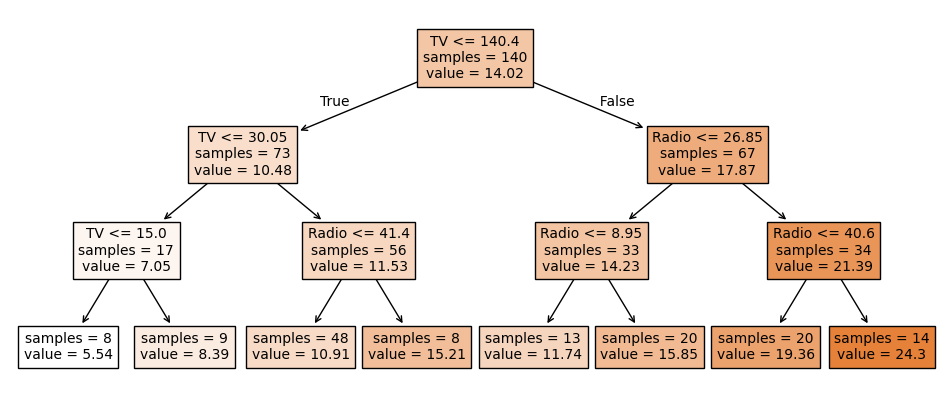

In [29]:
fig,ax=plt.subplots(figsize=(12,5))
plot=plot_tree(decision_tree=modelo_ar,feature_names=datos.drop(columns="Sales").columns,filled=True,impurity=False,fontsize=10,precision=2,ax=ax)

In [31]:
texto_modelo=export_text(
    decision_tree=modelo_ar,
    feature_names=list(datos.drop(columns="Sales").columns)
)
print(texto_modelo)

|--- TV <= 140.40
|   |--- TV <= 30.05
|   |   |--- TV <= 15.00
|   |   |   |--- value: [5.54]
|   |   |--- TV >  15.00
|   |   |   |--- value: [8.39]
|   |--- TV >  30.05
|   |   |--- Radio <= 41.40
|   |   |   |--- value: [10.91]
|   |   |--- Radio >  41.40
|   |   |   |--- value: [15.21]
|--- TV >  140.40
|   |--- Radio <= 26.85
|   |   |--- Radio <= 8.95
|   |   |   |--- value: [11.74]
|   |   |--- Radio >  8.95
|   |   |   |--- value: [15.85]
|   |--- Radio >  26.85
|   |   |--- Radio <= 40.60
|   |   |   |--- value: [19.36]
|   |   |--- Radio >  40.60
|   |   |   |--- value: [24.30]



##4.3 Predicciones
La importancia de cada predictor en el modelo se calcula com ola reducción total (normalizada) en el criterio de división. En este caso, el mse que consigue el predictor en las divisiones en las que participa. Si un predictor no se ha seleccionado en ninguna división, no se incluye en el modelo y su importancia es 0

In [38]:
importancia_predictores=pd.DataFrame(
    {"predictor": datos.drop(columns="Sales").columns,
     "importancia": modelo_ar.feature_importances_}
)

In [39]:
importancia_predictores.sort_values(by="importancia",ascending=False)

,predictor,importancia
0,TV,0.624932
1,Radio,0.375068
2,Newspaper,0.000000
3,Web,0.000000
